<a href="https://colab.research.google.com/github/nguyenvu282/17A1_DHKL_23174600064_NGUYENVANVU/blob/main/B%C3%80I_TAP_1_NH%C3%93M_2_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Giới thiệu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
penguins = sns.load_dataset('penguins')
print('Thông tin tổng quan dứ liệu')
print(penguins.info())
print('5 dòng đầu dữ liệu\n',penguins.head())




Thông tin tổng quan dứ liệu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
5 dòng đầu dữ liệu
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN           

In [ ]:
# hàm check dữ liệu thiếu
def check_miss_value(dt):
  for col in dt.columns:
    miss_value = dt[col].isna().sum()
    miss_percentt = miss_value/len(dt)*100

    print(f"cột {col} có {miss_value} giá trị bị thiếu là {round(miss_percentt)}%")
check_miss_value(penguins)


cột species có 0 giá trị bị thiếu là 0%
cột island có 0 giá trị bị thiếu là 0%
cột bill_length_mm có 2 giá trị bị thiếu là 1%
cột bill_depth_mm có 2 giá trị bị thiếu là 1%
cột flipper_length_mm có 2 giá trị bị thiếu là 1%
cột body_mass_g có 2 giá trị bị thiếu là 1%
cột sex có 11 giá trị bị thiếu là 3%


In [ ]:
# hàm làm sạch dữ liệu
def clean_data_miss(data):
  for col in data.columns:
    if data[col].dtype =='object':
      data[col] = data[col].fillna(data[col].mode()[0])
    else:
      data[col] = data[col].fillna(data[col].median())
  return data

penguins = clean_data_miss(penguins)
penguins
penguins.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# thống kê mô tả cơ bản
print('Mô tả thống kê cơ bản\n',penguins.describe())

Mô tả thống kê cơ bản
        bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      344.000000     344.000000         344.000000   344.000000
mean        43.925000      17.152035         200.892442  4200.872093
std          5.443792       1.969060          14.023826   799.696532
min         32.100000      13.100000         172.000000  2700.000000
25%         39.275000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


<Figure size 800x400 with 0 Axes>

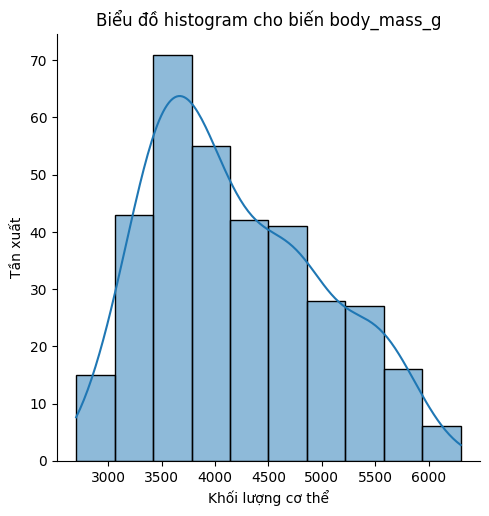

In [ ]:
from pickle import TRUE
# vẽ biểu đồ histogram cho các biến body_mass_g
plt.figure(figsize=(8,4)); # chiều cao ,rộng của biểu đồ
sns.displot(data=penguins,x='body_mass_g',bins=10,kde=TRUE); # bin chai dữ liệu thành 10 khảng đều nhau ,kde thêm đường cong
plt.title('Biểu đồ histogram cho biến body_mass_g'); # thêm tên biểu đồ
plt.xlabel('Khối lượng cơ thể'); # tên trục x
plt.ylabel('Tần xuất'); # tên trục y


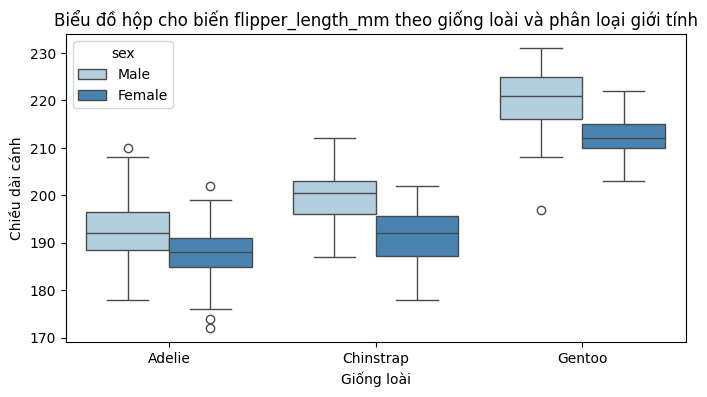

In [ ]:
# biểu dồ hộp (boxplot)
plt.figure(figsize=(8,4))
sns.boxplot(data=penguins,x='species',y='flipper_length_mm',hue='sex',palette='Blues') # hue chia giới tính thành 2
plt.title('Biểu đồ hộp cho biến flipper_length_mm theo giống loài và phân loại giới tính');
plt.xlabel('Giống loài');
plt.ylabel('Chiều dài cánh');


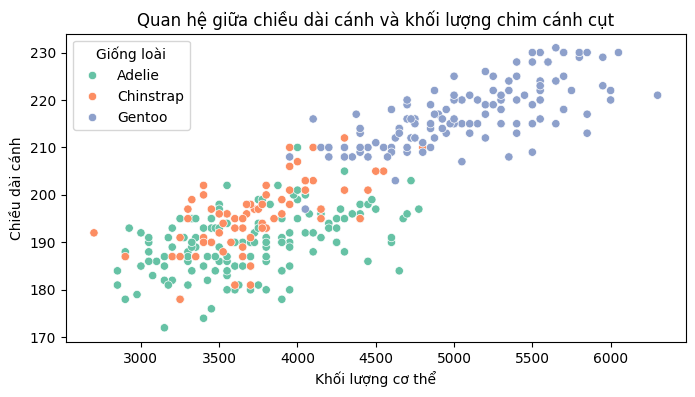

In [ ]:
# Biểu đồ scatterplot
plt.figure(figsize=(8,4))
sns.scatterplot(data=penguins,x='body_mass_g',y='flipper_length_mm',hue='species',palette='Set2'); # hue tô màu cho giống loài
plt.title("Quan hệ giữa chiều dài cánh và khối lượng chim cánh cụt");
plt.xlabel('Khối lượng cơ thể');
plt.ylabel('Chiều dài cánh');
plt.legend(title='Giống loài'); # chú thích


Số lượng cho thấy dữ số lượng loài k chênh quá nhiều


/tmp/ipython-input-4064778661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=penguins,x='species',palette='Set2')


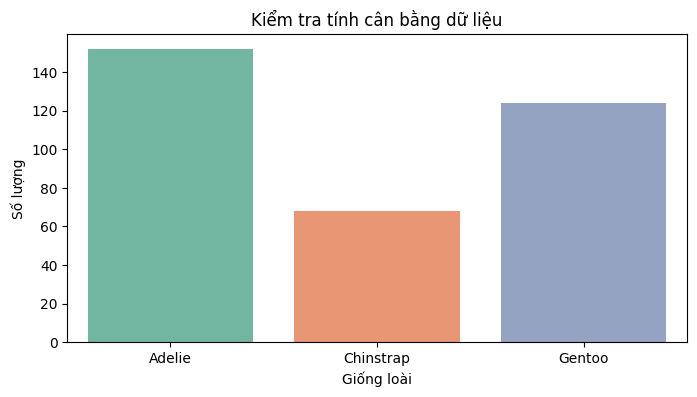

In [ ]:
# Kiểm tra tính cân bằng và pp dữ liệu
plt.figure(figsize=(8,4))
sns.countplot(data=penguins,x='species',palette='Set2')
plt.title('Kiểm tra tính cân bằng dữ liệu');
plt.xlabel('Giống loài');
plt.ylabel('Số lượng');
print('Số lượng cho thấy dữ số lượng loài k chênh quá nhiều')


dữ liệu theo pp chuẩn lệch phải


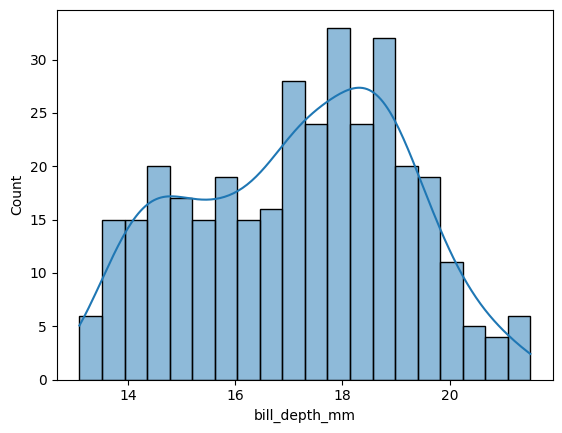

In [ ]:
# Kiểm tra pp dữ liệu
sns.histplot(penguins['bill_depth_mm'],kde=True,bins=20);
print('dữ liệu theo pp chuẩn lệch phải')


dữ liệu theo pp chuẩn vs 3 loài khác nhau


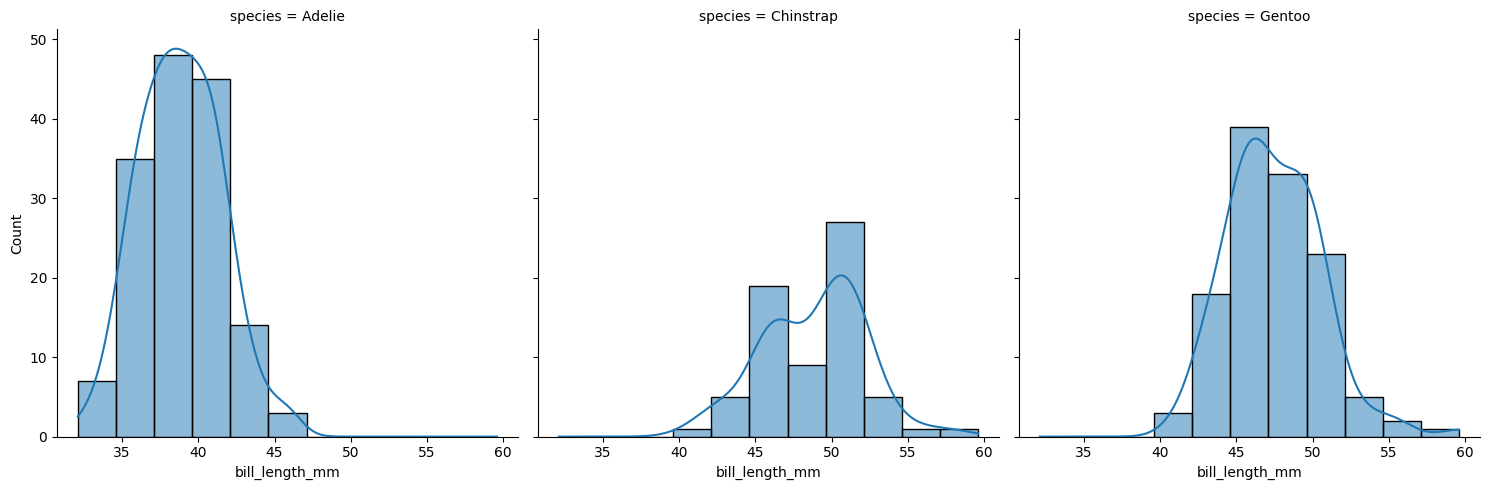

In [ ]:
sns.displot(data=penguins,x='bill_length_mm',col='species',kde=TRUE)
print('dữ liệu theo pp chuẩn vs 3 loài khác nhau')


dữ liệu theo pp chuẩn theo 3 loài khác nhau


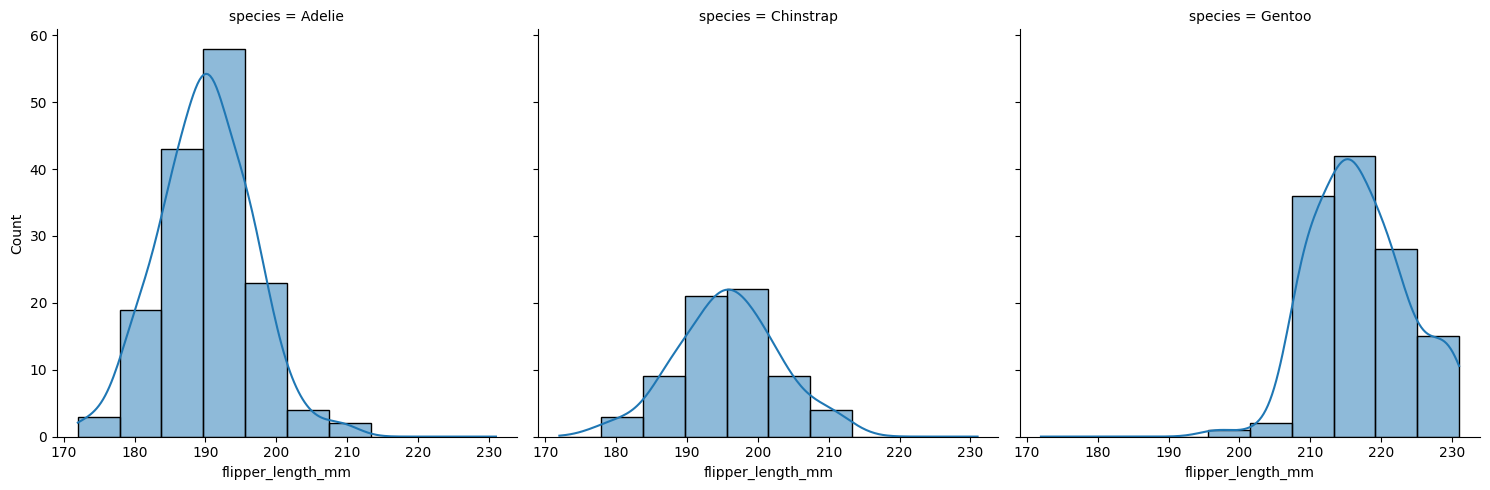

In [ ]:
sns.displot(data=penguins,x='flipper_length_mm',col='species',kde=TRUE);
print('dữ liệu theo pp chuẩn theo 3 loài khác nhau')


dữ liệu theo pp chuẩn


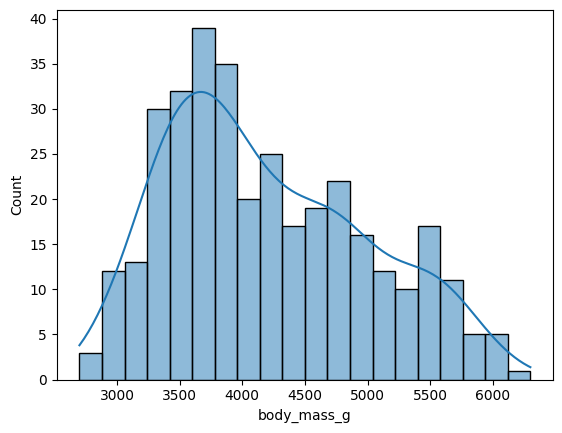

In [ ]:
sns.histplot(penguins['body_mass_g'],kde=True,bins=20);
print('dữ liệu theo pp chuẩn')


In [ ]:
# chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler  # lấy lớp standarscoler từ sklearn.pre...
scaler = StandardScaler() # tạo 1 đối tượng chuẩn hóa
penguins.iloc[:,2:6] = scaler.fit_transform(penguins.iloc[:,2:6]) # fit tính mean(),std và transform mỗi giá trị x chuyển thành z=(x-mean)/std
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.887622,0.787289,-1.420541,-0.564625,Male
1,Adelie,Torgersen,-0.814037,0.126114,-1.063485,-0.502010,Female
2,Adelie,Torgersen,-0.666866,0.431272,-0.420786,-1.190773,Female
3,Adelie,Torgersen,0.096581,0.075255,-0.277964,-0.188936,Male
4,Adelie,Torgersen,-1.329133,1.092447,-0.563608,-0.940314,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,0.096581,0.075255,-0.277964,-0.188936,Male
340,Gentoo,Biscoe,0.528894,-1.450534,1.007436,0.812900,Female
341,Gentoo,Biscoe,1.191161,-0.738500,1.507314,1.939966,Male
342,Gentoo,Biscoe,0.234553,-1.196236,0.793203,1.251204,Female
